<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Algebra" data-toc-modified-id="Algebra-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Algebra</a></span></li></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Algebra" data-toc-modified-id="Algebra-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Algebra</a></span></li></ul></div>

# Algebra

Linear equation:
$$
\boldsymbol { Y } = \boldsymbol { A } \boldsymbol { X }
$$

Dependent variable Y is called response or target:
$$
\boldsymbol { Y } = \left[ \begin{array} { c } { y _ { 1 } } \\ { y _ { 2 } } \\ { \cdots } \\ { y _ { N } } \end{array} \right]
$$

Independent variable, A is augmented matrix.
$$
\boldsymbol { A } = \left[ \begin{array} { c c } { 1 } & { x _ { 1 } } \\ { 1 } & { x _ { 2 } } \\ { \cdots } \\ { 1 } & { x _ { N } } \end{array} \right]
$$


Covariance matrix:
$$
C = \left[ \begin{array} { c c c c } { \sigma _ { y 1 } ^ { 2 } } & { 0 } & { \cdots } & { 0 } \\ { 0 } & { \sigma _ { y 2 } ^ { 2 } } & { \cdots } & { 0 } \\ { 0 } & { y _ { y 2 } } & { \cdots } & { 0 } \\ { 0 } & { 0 } & { \cdots } & { \sigma _ { y N } ^ { 2 } } \end{array} \right]
$$

Covariance matrix when we have uncertainties in both x and y:
$$
\left[ \begin{array} { c c } { \sigma _ { x } ^ { 2 } } & { \rho _ { x y } \sigma _ { x } \sigma _ { y } } \\ { \rho _ { x y } \sigma _ { x } \sigma _ { y } } & { \sigma _ { y } ^ { 2 } } \end{array} \right]
$$

Solution to linear equation:
$$
parameters = \left[ \begin{array} { c } { \mathrm { b } } \\ { \mathrm { m } } \end{array} \right] = \boldsymbol { X } = \left[ \boldsymbol { A } ^ { \top } \boldsymbol { C } ^ { - 1 } \boldsymbol { A } \right] ^ { - 1 } \left[ \boldsymbol { A } ^ { \top } \boldsymbol { C } ^ { - 1 } \boldsymbol { Y } \right]
$$

In [1]:
# Load a dataset with first 5 rows as outliers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
%matplotlib inline

import scipy.linalg as linalg

In [2]:
# load data
df = pd.read_csv('data_allerr.dat',sep='&')
df.columns = [i.strip('#').strip() for i in df.columns]
print(df.shape)
df.head(10)

(20, 6)


,index,x,y,sigm_y,sigma_x,corr
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33
5,6,58,173,15,9,0.67
6,7,210,479,27,4,-0.02
7,8,202,504,14,4,-0.05
8,9,198,510,30,11,-0.84
9,10,158,416,16,7,-0.69


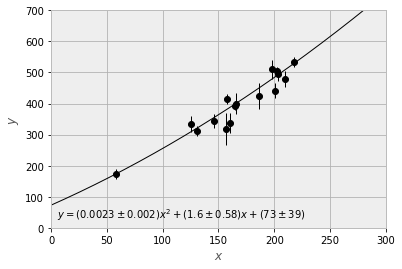

In [20]:
# matrices A,C, Y, yerr
df1 = df.iloc[4:, :]
x = df1.x.values
y = df1.y.values
yerr = df1['sigm_y'].values  # sigma y is yerr

degree = 2
Y = y
A = np.vander(x, degree+1, increasing=True).astype(float)  # 1, x, x**2
C = np.diag(yerr*yerr)  # diagonal matrix of yerr**2

# Bestfit
cinv = linalg.inv(C)
cinv_y = cinv @ Y.T
at_cinv_y = A.T @ cinv_y

cinv_a = cinv @ A
at_cinv_a = A.T @ cinv_a

bestfitvar = linalg.inv(at_cinv_a)
bestfit = bestfitvar @ at_cinv_y  # bestfit = params = c,b,a for ax**2 + bx + c

# plot bestfit
xrange = [0, 300]
yrange = [0, 700]
nsamples = 1001
xs = np.linspace(xrange[0], xrange[1], nsamples)
ys = np.zeros(len(xs))
for i in range(len(bestfit)):
    ys += bestfit[i] * xs**i

# plot
plt.plot(xs, ys, 'k-')
plt.xlim(xrange)
plt.ylim(yrange)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.errorbar(x, y, yerr, marker='o',color='k', linestyle='None')


# print text
# reverse the bestfit and bestfitvar
params = bestfit.tolist()[::-1]
err = np.sqrt(np.diag(bestfitvar)).tolist()[::-1]

# alternative params and err
params_err = [None]*(len(params)+len(err))
params_err[::2] = params
params_err[1::2] = err

# format text
fmt = [ ('({:.2g} \pm {:.2g})x^' + str(i) +' + ') for i in reversed(range(len(params)))]
fmt = ''.join(fmt)
fmt = fmt.rstrip('x^0 + ').replace('x^1','x')
text = r'$y = ' + fmt.format(*params_err) + r'$'

# plot text
plt.text(5, 30, text)
plt.show()